<h2> Imports

In [1]:
#in the following code, a Gaussian Naive Bayes Classifier will be build to predict whether a person makes over 50K a year

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv), Python data analysis library
import matplotlib.pyplot as plt # for data visualization purposes
import seaborn as sns # for statistical data visualization; to explore the purpose and target column

# Machine Learning and data analysis

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score
from sklearn.metrics import fbeta_score

<h2> Loading the dataset

In [2]:
#import dataset as ds
#path = 'C:/Users/evafi/bayes_xml/dataset/adult_income_dataset.csv'
#path = '/Users/fabian/Desktop/datasets/adult.csv'
path = 'C:\\Users\\Natal\\Documents\\Wirtschaftsinformatik_Master\\2.Semester_WS2023-24\\Explainable Machine Learning\\Prüfungsleistung\\adult income dataset.csv'

data = pd.read_csv(path, sep=",")
data2 = data

#top 5 of each column
data.head()

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K
1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K
2,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K
3,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K
4,18,?,103497,Some-college,10,Never-married,?,Own-child,White,Female,0,0,30,United-States,<=50K


In [3]:
data

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K
1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K
2,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K
3,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K
4,18,?,103497,Some-college,10,Never-married,?,Own-child,White,Female,0,0,30,United-States,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48837,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
48838,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
48839,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K
48840,22,Private,201490,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K


<h2> Analyze the dataset

In [4]:
# shape dataset
#numer of rows and columns/ features
data.shape

(48842, 15)

In [5]:
#data analysis
n_records = data.shape[0]
n_greater_50k = data[data['income'] == '>50K'].shape[0]
n_at_most_50k = data[data['income'] == '<=50K'].shape[0]
greater_percent = (n_greater_50k / n_records) * 100
print("Total numbber of records: {}".format(n_records))
print("Individuals making more than $50.000: {}".format(n_greater_50k))
print("Individuals making at most $50.000: {}".format(n_at_most_50k))
print("Percentage of individuals making more than $50.000: {}%".format(greater_percent))

Total numbber of records: 48842
Individuals making more than $50.000: 11687
Individuals making at most $50.000: 37155
Percentage of individuals making more than $50.000: 23.928176569346054%


In [6]:
#rename column names
col_names = ['age', 'workclass', 'fnlwgt', 'education', 'education_num', 'marital_status', 'occupation', 'relationship',
             'race', 'sex', 'capital_gain', 'capital_loss', 'hours_per_week', 'native_country', 'income']
data.columns = col_names
data.columns

Index(['age', 'workclass', 'fnlwgt', 'education', 'education_num',
       'marital_status', 'occupation', 'relationship', 'race', 'sex',
       'capital_gain', 'capital_loss', 'hours_per_week', 'native_country',
       'income'],
      dtype='object')

In [7]:
# general inforamtion
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48842 entries, 0 to 48841
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             48842 non-null  int64 
 1   workclass       48842 non-null  object
 2   fnlwgt          48842 non-null  int64 
 3   education       48842 non-null  object
 4   education_num   48842 non-null  int64 
 5   marital_status  48842 non-null  object
 6   occupation      48842 non-null  object
 7   relationship    48842 non-null  object
 8   race            48842 non-null  object
 9   sex             48842 non-null  object
 10  capital_gain    48842 non-null  int64 
 11  capital_loss    48842 non-null  int64 
 12  hours_per_week  48842 non-null  int64 
 13  native_country  48842 non-null  object
 14  income          48842 non-null  object
dtypes: int64(6), object(9)
memory usage: 5.6+ MB


In [8]:
#Overview of the data
data.describe(include='all')

,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,income
count,48842.000000,48842,4.884200e+04,48842,48842.000000,48842,48842,48842,48842,48842,48842.000000,48842.000000,48842.000000,48842,48842
unique,NaN,9,NaN,16,NaN,7,15,6,5,2,NaN,NaN,NaN,42,2
top,NaN,Private,NaN,HS-grad,NaN,Married-civ-spouse,Prof-specialty,Husband,White,Male,NaN,NaN,NaN,United-States,<=50K
freq,NaN,33906,NaN,15784,NaN,22379,6172,19716,41762,32650,NaN,NaN,NaN,43832,37155
mean,38.643585,NaN,1.896641e+05,NaN,10.078089,NaN,NaN,NaN,NaN,NaN,1079.067626,87.502314,40.422382,NaN,NaN
std,13.710510,NaN,1.056040e+05,NaN,2.570973,NaN,NaN,NaN,NaN,NaN,7452.019058,403.004552,12.391444,NaN,NaN
min,17.000000,NaN,1.228500e+04,NaN,1.000000,NaN,NaN,NaN,NaN,NaN,0.000000,0.000000,1.000000,NaN,NaN
25%,28.000000,NaN,1.175505e+05,NaN,9.000000,NaN,NaN,NaN,NaN,NaN,0.000000,0.000000,40.000000,NaN,NaN
50%,37.000000,NaN,1.781445e+05,NaN,10.000000,NaN,NaN,NaN,NaN,NaN,0.000000,0.000000,40.000000,NaN,NaN
75%,48.000000,NaN,2.376420e+05,NaN,12.000000,NaN,NaN,NaN,NaN,NaN,0.000000,0.000000,45.000000,NaN,NaN


<h2>Preprocessing the data

<h4> Check values in each variable and replace them / Dealing with missing values

In [9]:
#check "?" in dataset

col_n = data.columns
num_data = data.shape[0]
for c in col_n:
    num_non = data[c].isin(["?"]).sum()
    if num_non > 0:
        print(c)
        print(num_non)
        print("{0:.2f}%".format(float(num_non) / num_data * 100))

workclass
2799
5.73%
occupation
2809
5.75%
native_country
857
1.75%


In [10]:
# replace '?' values in workclass variable with `NaN`
data['workclass'].replace('?', np.NaN, inplace=True)

# replace '?' values in occupation variable with `NaN`
data['occupation'].replace('?', np.NaN, inplace=True)

# replace '?' values in native_country variable with `NaN`
data['native_country'].replace('?', np.NaN, inplace=True)

# impute missing categorical variables with most frequent value

# Fill missing values in 'workclass' column with mode
mode_workclass = data['workclass'].mode()[0]
data['workclass'].fillna(mode_workclass, inplace=True)

# Fill missing values in 'occupation' column with mode
mode_occupation = data['occupation'].mode()[0]
data['occupation'].fillna(mode_occupation, inplace=True)

# Fill missing values in 'native.country' column with mode
mode_native_country = data['native_country'].mode()[0]
data['native_country'].fillna(mode_native_country, inplace=True)

In [11]:
# Check for missing values again
data.isnull().sum()

age               0
workclass         0
fnlwgt            0
education         0
education_num     0
marital_status    0
occupation        0
relationship      0
race              0
sex               0
capital_gain      0
capital_loss      0
hours_per_week    0
native_country    0
income            0
dtype: int64

In [12]:
# find categorical variables

categorical = [var for var in data.columns if data[var].dtype=='O']

data[categorical].head()

,workclass,education,marital_status,occupation,relationship,race,sex,native_country,income
0,Private,11th,Never-married,Machine-op-inspct,Own-child,Black,Male,United-States,<=50K
1,Private,HS-grad,Married-civ-spouse,Farming-fishing,Husband,White,Male,United-States,<=50K
2,Local-gov,Assoc-acdm,Married-civ-spouse,Protective-serv,Husband,White,Male,United-States,>50K
3,Private,Some-college,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,United-States,>50K
4,Private,Some-college,Never-married,Prof-specialty,Own-child,White,Female,United-States,<=50K


In [13]:
# check missing values in categorical variables

data[categorical].isnull().sum()

workclass         0
education         0
marital_status    0
occupation        0
relationship      0
race              0
sex               0
native_country    0
income            0
dtype: int64

In [14]:
# view frequency counts of values in categorical variables

for var in categorical: 
    
    print(data[var].value_counts())

workclass
Private             36705
Self-emp-not-inc     3862
Local-gov            3136
State-gov            1981
Self-emp-inc         1695
Federal-gov          1432
Without-pay            21
Never-worked           10
Name: count, dtype: int64
education
HS-grad         15784
Some-college    10878
Bachelors        8025
Masters          2657
Assoc-voc        2061
11th             1812
Assoc-acdm       1601
10th             1389
7th-8th           955
Prof-school       834
9th               756
12th              657
Doctorate         594
5th-6th           509
1st-4th           247
Preschool          83
Name: count, dtype: int64
marital_status
Married-civ-spouse       22379
Never-married            16117
Divorced                  6633
Separated                 1530
Widowed                   1518
Married-spouse-absent      628
Married-AF-spouse           37
Name: count, dtype: int64
occupation
Prof-specialty       8981
Craft-repair         6112
Exec-managerial      6086
Adm-clerical         

<h4> Normalization

In [15]:
# check for cardinality in categorical variables
for var in categorical:
    print(var, ' contains ', len(data[var].unique()), ' labels')

workclass  contains  8  labels
education  contains  16  labels
marital_status  contains  7  labels
occupation  contains  14  labels
relationship  contains  6  labels
race  contains  5  labels
sex  contains  2  labels
native_country  contains  41  labels
income  contains  2  labels


In [16]:
# get numerical variables
numerical = [var for var in data.columns if data[var].dtype!='O']
print('There are {} numerical variables\n'.format(len(numerical)))
print('The numerical variables are :', numerical)

There are 6 numerical variables

The numerical variables are : ['age', 'fnlwgt', 'education_num', 'capital_gain', 'capital_loss', 'hours_per_week']


In [17]:
# Convert columns with numerical data to numeric data type
numerical_cols = ['age', 'fnlwgt', 'education_num', 'capital_gain', 'capital_loss', 'hours_per_week']
data[numerical_cols] = data[numerical_cols].apply(pd.to_numeric)

In [18]:
# Drop unnecessary columns
#data.drop(['fnlwgt'], axis=1, inplace=True)
#erstmal weglassen

In [19]:
data[numerical_cols]

,age,fnlwgt,education_num,capital_gain,capital_loss,hours_per_week
0,25,226802,7,0,0,40
1,38,89814,9,0,0,50
2,28,336951,12,0,0,40
3,44,160323,10,7688,0,40
4,18,103497,10,0,0,30
...,...,...,...,...,...,...
48837,27,257302,12,0,0,38
48838,40,154374,9,0,0,40
48839,58,151910,9,0,0,40
48840,22,201490,9,0,0,20


In [20]:
corrmat = data[numerical_cols].corr()
print(corrmat)

                     age    fnlwgt  education_num  capital_gain  capital_loss   
age             1.000000 -0.076628       0.030940      0.077229      0.056944  \
fnlwgt         -0.076628  1.000000      -0.038761     -0.003706     -0.004366   
education_num   0.030940 -0.038761       1.000000      0.125146      0.080972   
capital_gain    0.077229 -0.003706       0.125146      1.000000     -0.031441   
capital_loss    0.056944 -0.004366       0.080972     -0.031441      1.000000   
hours_per_week  0.071558 -0.013519       0.143689      0.082157      0.054467   

                hours_per_week  
age                   0.071558  
fnlwgt               -0.013519  
education_num         0.143689  
capital_gain          0.082157  
capital_loss          0.054467  
hours_per_week        1.000000  


Text(0.5, 1.0, 'Correlation Heatmap')

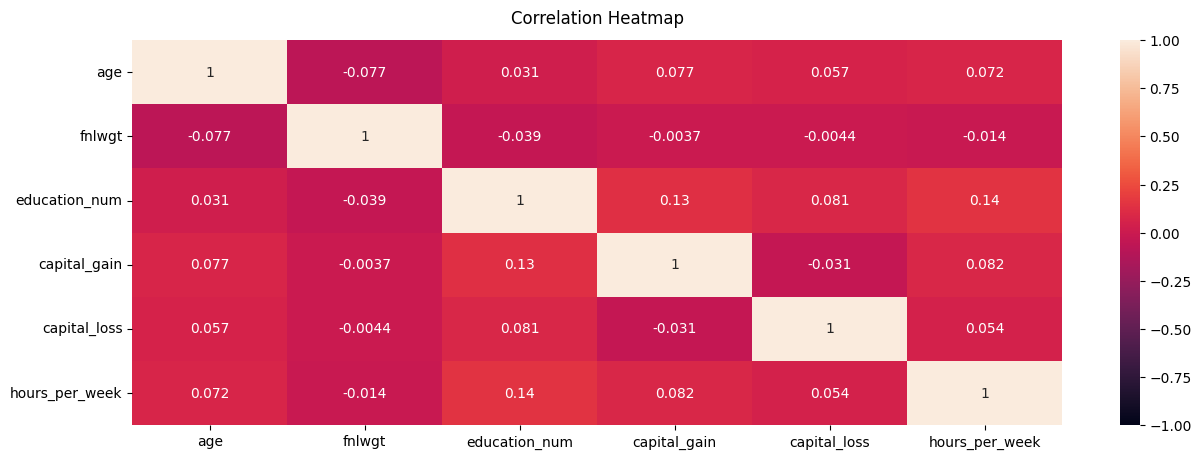

In [21]:
plt.figure(figsize=(15,5))
heatmap = sns.heatmap(corrmat, vmin=-1, vmax=1, annot=True)
heatmap.set_title('Correlation Heatmap', fontdict={'fontsize':12}, pad=12)

In [22]:
# Split the data into features and target label
income_raw = data['income']
features_raw = data.drop('income', axis = 1)

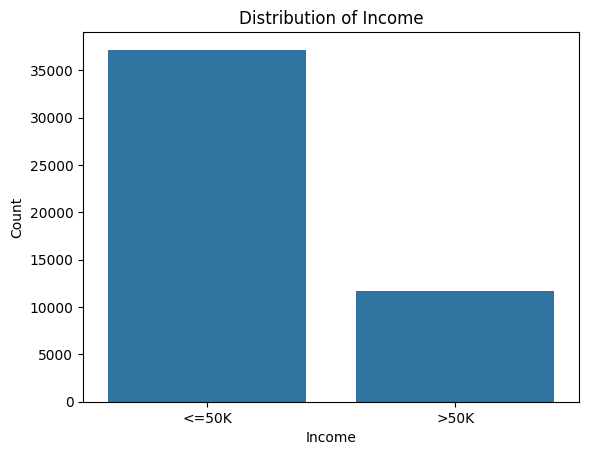

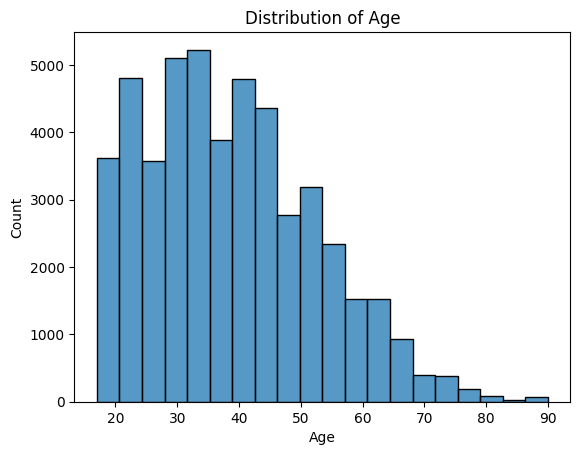

In [23]:
# Visualize the distribution of income
sns.countplot(x='income', data=data)
plt.title('Distribution of Income')
plt.xlabel('Income')
plt.ylabel('Count')
plt.show()

# Visualize the distribution of age
sns.histplot(data['age'], bins=20)
plt.title('Distribution of Age')
plt.xlabel('Age')
plt.ylabel('Count')
plt.show()

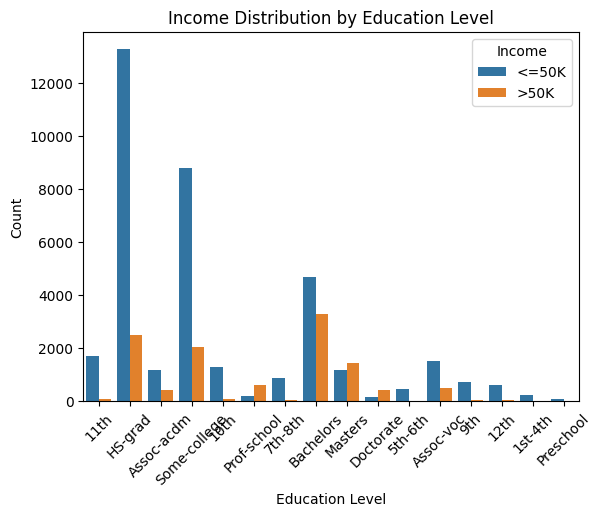

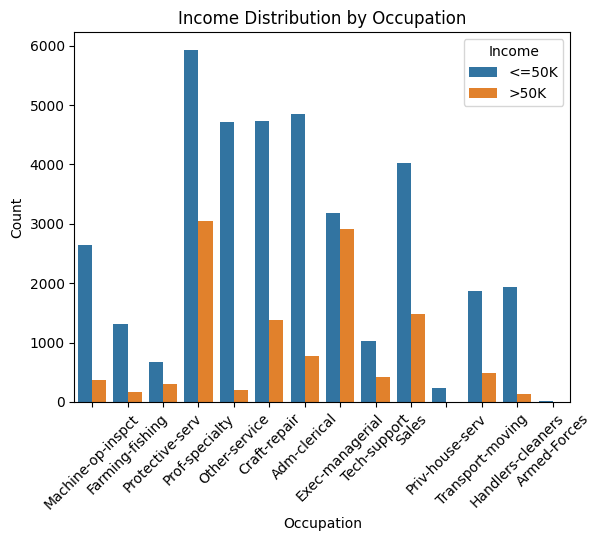

In [24]:
# Visualize the income distribution by education level
sns.countplot(x='education', hue='income', data=data)
plt.title('Income Distribution by Education Level')
plt.xlabel('Education Level')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.legend(title='Income', loc='upper right')
plt.show()

# Visualize the income distribution by occupation
sns.countplot(x='occupation', hue='income', data=data)
plt.title('Income Distribution by Occupation')
plt.xlabel('Occupation')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.legend(title='Income', loc='upper right')
plt.show()

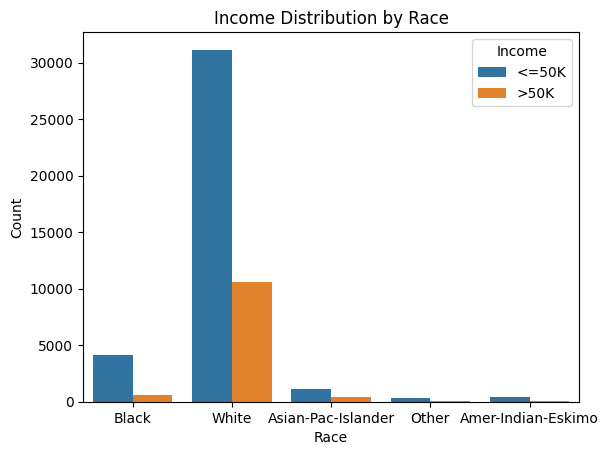

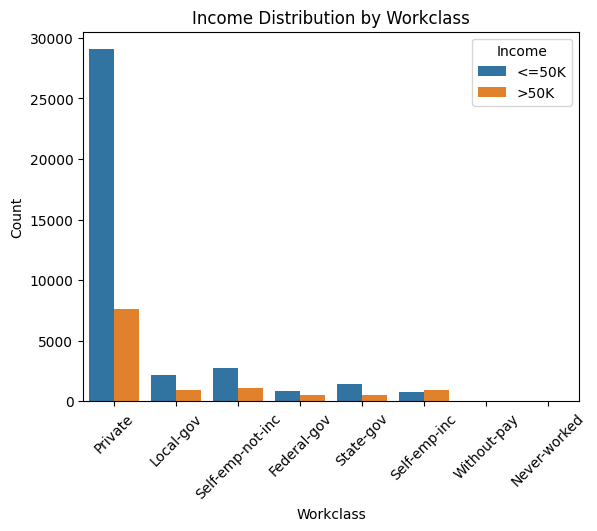

In [25]:
# Visualize the income distribution by race
sns.countplot(x='race', hue='income', data=data)
plt.title('Income Distribution by Race')
plt.xlabel('Race')
plt.ylabel('Count')
plt.legend(title='Income', loc='upper right')
plt.show()


# Visualize the income distribution by workclass
sns.countplot(x='workclass', hue='income', data=data)
plt.title('Income Distribution by Workclass')
plt.xlabel('Workclass')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.legend(title='Income', loc='upper right')
plt.show()

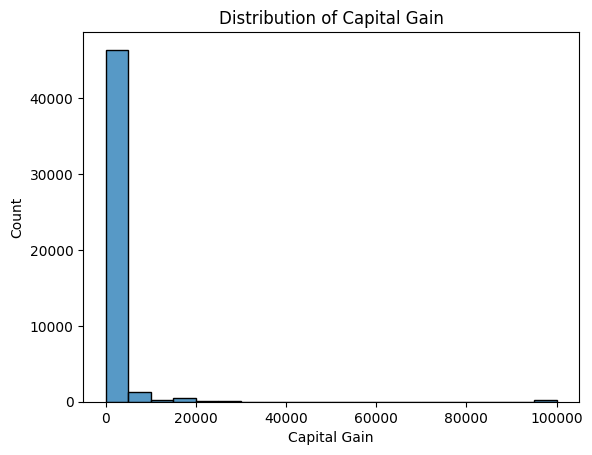

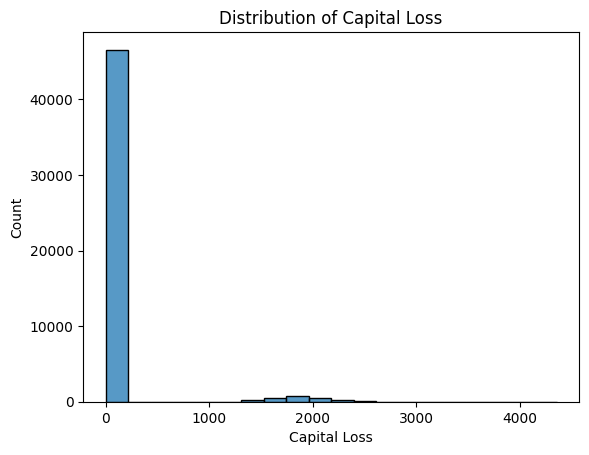

In [26]:
# Visualize the distribution of capital-gain
sns.histplot(data['capital_gain'], bins=20)
plt.title('Distribution of Capital Gain')
plt.xlabel('Capital Gain')
plt.ylabel('Count')
plt.show()

# Visualize the distribution of capital-loss
sns.histplot(data['capital_loss'], bins=20)
plt.title('Distribution of Capital Loss')
plt.xlabel('Capital Loss')
plt.ylabel('Count')
plt.show()

In [27]:
# Log-transform the skewed features
skewed = ['capital_gain', 'capital_loss']
features_log_transformed = pd.DataFrame(data = features_raw)
features_log_transformed[skewed] = features_raw[skewed].apply(lambda x: np.log(x + 1))

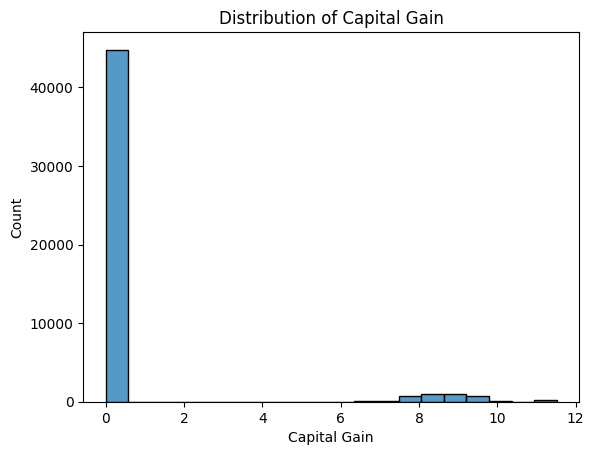

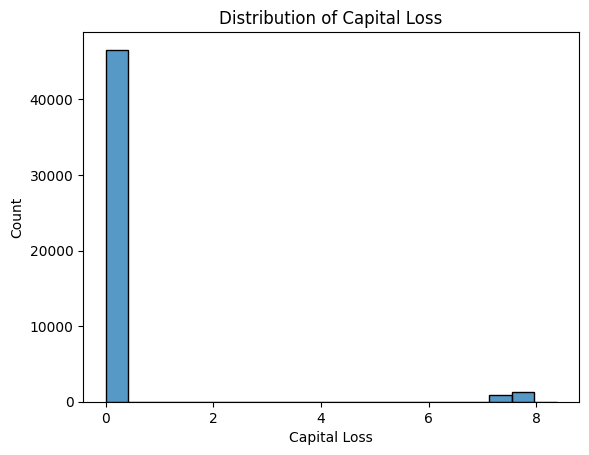

In [28]:
# Visualize the distribution of capital-gain after transformation
sns.histplot(features_log_transformed['capital_gain'], bins=20)
plt.title('Distribution of Capital Gain')
plt.xlabel('Capital Gain')
plt.ylabel('Count')
plt.show()

# Visualize the distribution of capital-loss after transformation
sns.histplot(features_log_transformed['capital_loss'], bins=20)
plt.title('Distribution of Capital Loss')
plt.xlabel('Capital Loss')
plt.ylabel('Count')
plt.show()

In [29]:
from sklearn.preprocessing import MinMaxScaler
# Initialize a scaler, then apply it to the features
scaler = MinMaxScaler()
numerical = ['age', 'education_num', 'capital_gain', 'capital_loss', 'hours_per_week']

features_log_minmax_transform = pd.DataFrame(data)
features_log_minmax_transform[numerical] = scaler.fit_transform(features_log_minmax_transform[numerical])
# Show an example of a record with scaling applied
display(features_log_minmax_transform.head(n=5))

,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,income
0,0.109589,Private,226802,11th,0.400000,Never-married,Machine-op-inspct,Own-child,Black,Male,0.000000,0.0,0.397959,United-States,<=50K
1,0.287671,Private,89814,HS-grad,0.533333,Married-civ-spouse,Farming-fishing,Husband,White,Male,0.000000,0.0,0.500000,United-States,<=50K
2,0.150685,Local-gov,336951,Assoc-acdm,0.733333,Married-civ-spouse,Protective-serv,Husband,White,Male,0.000000,0.0,0.397959,United-States,>50K
3,0.369863,Private,160323,Some-college,0.600000,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,0.076881,0.0,0.397959,United-States,>50K
4,0.013699,Private,103497,Some-college,0.600000,Never-married,Prof-specialty,Own-child,White,Female,0.000000,0.0,0.295918,United-States,<=50K


In [30]:
#preprocessing categorial features

features_log_minmax_transform.head(1)

,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,income
0,0.109589,Private,226802,11th,0.4,Never-married,Machine-op-inspct,Own-child,Black,Male,0.0,0.0,0.397959,United-States,<=50K


In [31]:
# Transform Categorial into Numerical
# One-hot encode the 'features_log_minmax_transform' data 
features_final = pd.get_dummies(features_log_minmax_transform)

# Encode the 'income_raw' data to numerical values
income = income_raw.map({'<=50K':0,'>50K':1})

# Print the number of features after one-hot encoding
encoded = list(features_final.columns)
print("{} total features after one-hot encoding.".format(len(encoded)))

# See the encoded feature names
print (encoded)

107 total features after one-hot encoding.
['age', 'fnlwgt', 'education_num', 'capital_gain', 'capital_loss', 'hours_per_week', 'workclass_Federal-gov', 'workclass_Local-gov', 'workclass_Never-worked', 'workclass_Private', 'workclass_Self-emp-inc', 'workclass_Self-emp-not-inc', 'workclass_State-gov', 'workclass_Without-pay', 'education_10th', 'education_11th', 'education_12th', 'education_1st-4th', 'education_5th-6th', 'education_7th-8th', 'education_9th', 'education_Assoc-acdm', 'education_Assoc-voc', 'education_Bachelors', 'education_Doctorate', 'education_HS-grad', 'education_Masters', 'education_Preschool', 'education_Prof-school', 'education_Some-college', 'marital_status_Divorced', 'marital_status_Married-AF-spouse', 'marital_status_Married-civ-spouse', 'marital_status_Married-spouse-absent', 'marital_status_Never-married', 'marital_status_Separated', 'marital_status_Widowed', 'occupation_Adm-clerical', 'occupation_Armed-Forces', 'occupation_Craft-repair', 'occupation_Exec-manage

<h2>Building the Model

<h4>Declare feature vector and target variable

In [32]:
X = data.drop(['income'], axis=1)

y = data['income']

<h4> Split data into separate training and test set 

In [33]:
# split X and y into training and testing sets

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 0)

In [34]:
# check the shape of X_train and X_test
X_train.shape, X_test.shape

((34189, 14), (14653, 14))

<h4> Feature Engineering

In [35]:
# check data types in X_train
X_train.dtypes

age                int64
workclass         object
fnlwgt             int64
education         object
education_num      int64
marital_status    object
occupation        object
relationship      object
race              object
sex               object
capital_gain       int64
capital_loss       int64
hours_per_week     int64
native_country    object
dtype: object

In [36]:
# display categorical variables
categorical = [col for col in X_train.columns if X_train[col].dtypes == 'O']
categorical

['workclass',
 'education',
 'marital_status',
 'occupation',
 'relationship',
 'race',
 'sex',
 'native_country']

In [37]:
# display numerical variables
numerical = [col for col in X_train.columns if X_train[col].dtypes != 'O']
numerical

['age',
 'fnlwgt',
 'education_num',
 'capital_gain',
 'capital_loss',
 'hours_per_week']

In [38]:
# print percentage of missing values in the categorical variables in training set
X_train[categorical].isnull().mean()

workclass         0.0
education         0.0
marital_status    0.0
occupation        0.0
relationship      0.0
race              0.0
sex               0.0
native_country    0.0
dtype: float64

In [39]:
# check missing values in categorical variables in X_test
X_test[categorical].isnull().sum()

workclass         0
education         0
marital_status    0
occupation        0
relationship      0
race              0
sex               0
native_country    0
dtype: int64

In [40]:
# print categorical variables with missing data
#for col in categorical:
    #if X_train[col].isnull().mean()>0:
        #print(col, (X_train[col].isnull().mean()))

In [41]:
# impute missing categorical variables with most frequent value
#for df2 in [X_train, X_test]:
    #df2['workclass'].fillna(X_train['workclass'].mode()[0], inplace=True)
    #df2['occupation'].fillna(X_train['occupation'].mode()[0], inplace=True)
    #df2['native_country'].fillna(X_train['native_country'].mode()[0], inplace=True) 
#not necessary, we already filled missing variables

In [42]:
X_train.columns

Index(['age', 'workclass', 'fnlwgt', 'education', 'education_num',
       'marital_status', 'occupation', 'relationship', 'race', 'sex',
       'capital_gain', 'capital_loss', 'hours_per_week', 'native_country'],
      dtype='object')

<h4> Encode categorical variables

In [43]:
# print categorical variables
X_train[categorical].head()

,workclass,education,marital_status,occupation,relationship,race,sex,native_country
3833,Local-gov,Some-college,Married-civ-spouse,Adm-clerical,Own-child,White,Female,United-States
34743,Private,10th,Married-civ-spouse,Craft-repair,Own-child,Other,Male,United-States
2022,Self-emp-not-inc,Assoc-voc,Married-civ-spouse,Farming-fishing,Husband,White,Male,United-States
1580,Private,Some-college,Never-married,Exec-managerial,Not-in-family,White,Female,United-States
4612,Private,HS-grad,Separated,Transport-moving,Unmarried,White,Female,United-States


In [44]:
# import category encoders
import category_encoders as ce

# encode remaining variables with one-hot encoding
encoder = ce.OneHotEncoder(cols=['workclass', 'education', 'marital_status', 'occupation', 'relationship','race', 'sex', 'native_country'])

X_train = encoder.fit_transform(X_train)
X_test = encoder.transform(X_test)

In [45]:
#print
X_train.head()

,age,workclass_1,workclass_2,workclass_3,workclass_4,workclass_5,workclass_6,workclass_7,workclass_8,fnlwgt,...,native_country_32,native_country_33,native_country_34,native_country_35,native_country_36,native_country_37,native_country_38,native_country_39,native_country_40,native_country_41
3833,27,1,0,0,0,0,0,0,0,131310,...,0,0,0,0,0,0,0,0,0,0
34743,42,0,1,0,0,0,0,0,0,367533,...,0,0,0,0,0,0,0,0,0,0
2022,32,0,0,1,0,0,0,0,0,38158,...,0,0,0,0,0,0,0,0,0,0
1580,36,0,1,0,0,0,0,0,0,148903,...,0,0,0,0,0,0,0,0,0,0
4612,29,0,1,0,0,0,0,0,0,359155,...,0,0,0,0,0,0,0,0,0,0


In [46]:
X_train.shape

(34189, 105)

In [47]:
X_test.shape

(14653, 105)

In [48]:
X_test.head()

,age,workclass_1,workclass_2,workclass_3,workclass_4,workclass_5,workclass_6,workclass_7,workclass_8,fnlwgt,...,native_country_32,native_country_33,native_country_34,native_country_35,native_country_36,native_country_37,native_country_38,native_country_39,native_country_40,native_country_41
38113,36,0,1,0,0,0,0,0,0,65624,...,0,0,0,0,0,0,0,0,0,0
39214,57,0,0,0,0,1,0,0,0,37345,...,0,0,0,0,0,0,0,0,0,0
44248,49,0,1,0,0,0,0,0,0,287647,...,0,0,0,0,0,0,0,0,0,0
10283,54,0,0,1,0,0,0,0,0,183668,...,0,0,0,0,0,0,0,0,0,0
26724,17,0,0,1,0,0,0,0,0,228786,...,0,0,0,0,0,0,0,0,0,0


<h4> Feature Scaling

In [49]:
cols = X_train.columns

from sklearn.preprocessing import RobustScaler
scaler = RobustScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)
X_train = pd.DataFrame(X_train, columns=[cols])
X_test = pd.DataFrame(X_test, columns=[cols])
X_train.head()

,age,workclass_1,workclass_2,workclass_3,workclass_4,workclass_5,workclass_6,workclass_7,workclass_8,fnlwgt,...,native_country_32,native_country_33,native_country_34,native_country_35,native_country_36,native_country_37,native_country_38,native_country_39,native_country_40,native_country_41
0,-0.50,1.0,-1.0,0.0,0.0,0.0,0.0,0.0,0.0,-0.387237,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.25,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.575857,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,-0.25,0.0,-1.0,1.0,0.0,0.0,0.0,0.0,0.0,-1.161362,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,-0.05,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-0.241033,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,-0.40,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.506233,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


<h2> Model training

In [50]:
# train a Gaussian Naive Bayes classifier on the training set
from sklearn.naive_bayes import GaussianNB

# instantiate the model
gnb = GaussianNB()

# fit the model
gnb.fit(X_train, y_train)

GaussianNB()

In [51]:
from sklearn.decomposition import PCA
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import make_scorer
from sklearn.metrics import fbeta_score
from sklearn.metrics import accuracy_score
from sklearn.model_selection import StratifiedKFold

In [52]:
result = []
param_distribution = {'var_smoothing': np.logspace(0, -9, num=100)}
scoring = 'accuracy'  

for i in range(1, 13):
    # PCA durchführen
    pca = PCA(n_components=i)
    X_train_pca = pca.fit_transform(X_train)
    
    # RandomizedSearchCV für den Naive Bayes Classifier
    search_cv = RandomizedSearchCV(GaussianNB(), param_distribution, scoring=scoring, n_jobs=-1,
                                   cv=StratifiedKFold(n_splits=10, shuffle=True), refit=scoring)
    search_cv.fit(X_train_pca, y_train)
    best_model = search_cv.best_estimator_

    # Testdaten transformieren
    X_test_pca = pca.transform(X_test)
    
    # Vorhersagen
    y_pred = best_model.predict(X_test_pca)
    
    # Modellbewertung
    f1 = fbeta_score(y_test, y_pred, beta=1, pos_label='>50K')
    acc = accuracy_score(y_test, y_pred)
    
    print(f"{i} {acc} {f1}")
    
    # Ergebnisse speichern
    result.append((i, acc, f1, pca, best_model))

1 0.8019518187401897 0.30970504281636535
2 0.8034532177711049 0.30735930735930733
3 0.8019518187401897 0.30970504281636535
4 0.8024295366136628 0.306254493170381
5 0.8024295366136628 0.306254493170381
6 0.8031802361291203 0.3293023255813953
7 0.7964239404900021 0.3765935214211076
8 0.7955367501535522 0.42517267843438217
9 0.8013376100457245 0.3281790906992846
10 0.8024295366136628 0.306254493170381
11 0.8023612912031666 0.3094897472579876
12 0.8024295366136628 0.3098927294398093


In [53]:
# Finde den Index der Zeile mit der höchsten Genauigkeit
best_index = np.argmax(np.array(result)[:, 1])

# Extrahiere die Informationen für die beste Zeile
best_row = result[best_index]

# Extrahiere die Anzahl der Hauptkomponenten und die PCA-Objekt
best_components_count = best_row[0]
best_pca = best_row[3]

# Extrahiere die Namen der drei Hauptkomponenten mit den höchsten Ladevektoren (Betrag)
top_three_indices = np.argsort(np.abs(best_pca.components_))[:, -3:]
top_three_feature_names = X_train.columns[top_three_indices.flatten()]

# Gib die Informationen aus
print("Beste Zeile mit höchster Genauigkeit:")
print(f"Anzahl der Hauptkomponenten: {best_components_count}")
print(f"Namen der drei Hauptkomponenten mit höchstem Betrag der Ladevektoren:")
print(top_three_feature_names)
print(f"Genauigkeit: {best_row[1]}")
print(f"F1-Score: {best_row[2]}")

Beste Zeile mit höchster Genauigkeit:
Anzahl der Hauptkomponenten: 2
Namen der drei Hauptkomponenten mit höchstem Betrag der Ladevektoren:
MultiIndex([('hours_per_week',),
            (  'capital_loss',),
            (  'capital_gain',),
            ('hours_per_week',),
            (  'capital_gain',),
            (  'capital_loss',)],
           )
Genauigkeit: 0.8034532177711049
F1-Score: 0.30735930735930733


In [54]:
# Extrahiere die eindeutigen Namen der Merkmale
unique_feature_names = set([name[0] for name in top_three_feature_names])

# Gib die eindeutigen Namen der Merkmale aus
print("Eindeutige Namen der drei Hauptkomponenten:")
print(unique_feature_names)

Eindeutige Namen der drei Hauptkomponenten:
{'capital_loss', 'capital_gain', 'hours_per_week'}


In [55]:
# Loadings Matrix für die ersten drei Hauptkomponenten
loadings_matrix = pca.components_

# Drucke die Loadings Matrix
print("Loadings Matrix:")
print(loadings_matrix)

Loadings Matrix:
[[ 6.79266655e-06 -3.18608980e-07 -2.87130794e-06 ... -5.23353812e-09
  -6.46988843e-09 -5.76871048e-10]
 [ 9.84933853e-05  4.04616703e-06 -3.94010559e-05 ... -2.23621991e-07
   9.33189781e-08  3.82990624e-07]
 [ 2.26614202e-02  1.24642421e-03 -2.12962325e-02 ...  1.26197236e-05
  -3.81738718e-05 -4.74916644e-06]
 ...
 [-5.37836554e-02  2.24043989e-01 -8.20066430e-01 ... -2.62719997e-04
   4.97895517e-05 -3.44444457e-05]
 [ 1.15623380e-01 -2.49370481e-02  2.04785044e-01 ...  3.82700432e-04
  -1.70779165e-04  1.29629774e-05]
 [ 1.00511403e-01  2.95694816e-02 -6.25589890e-03 ...  4.80078232e-04
   3.65349674e-04  9.20555850e-06]]


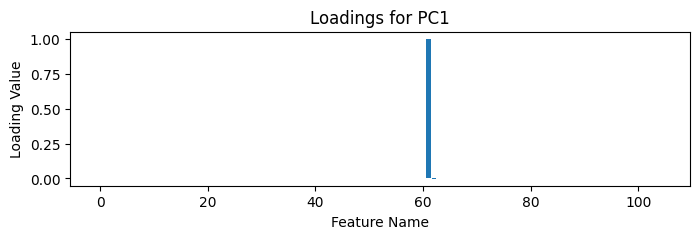

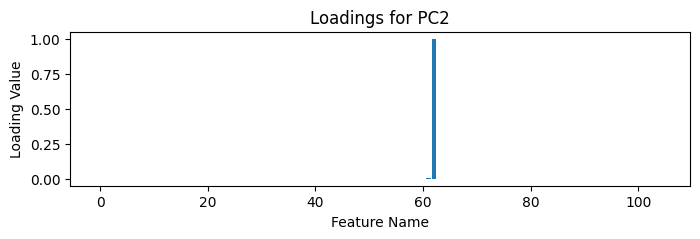

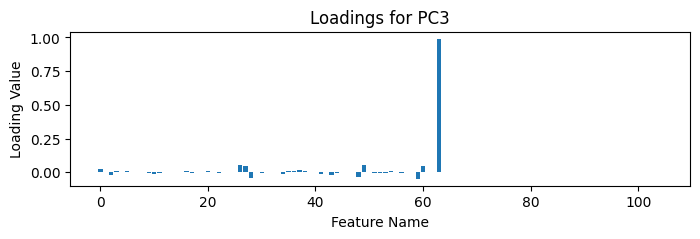

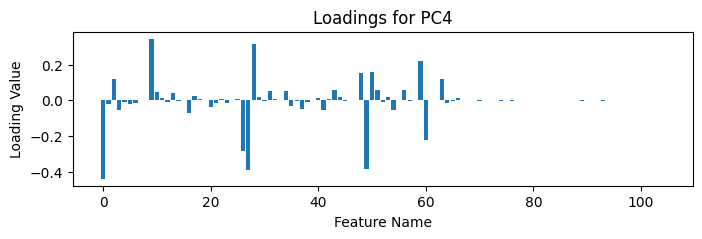

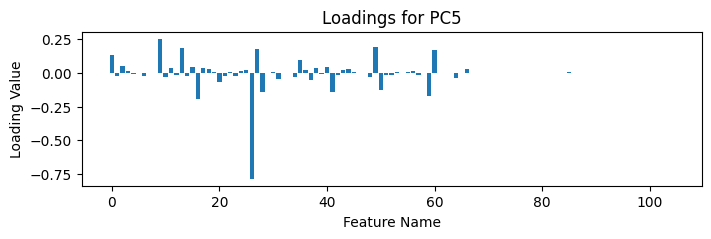

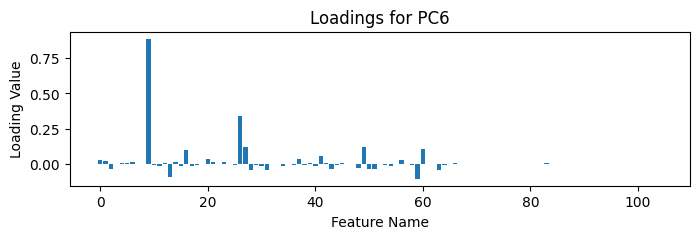

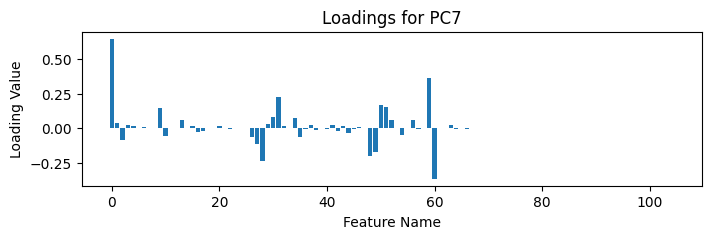

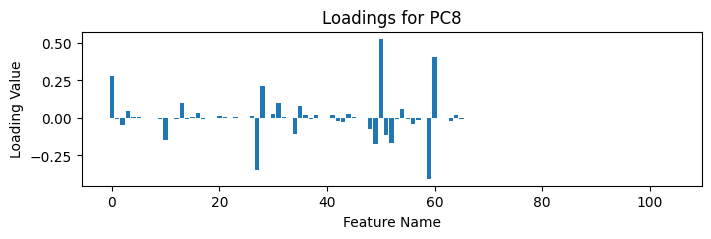

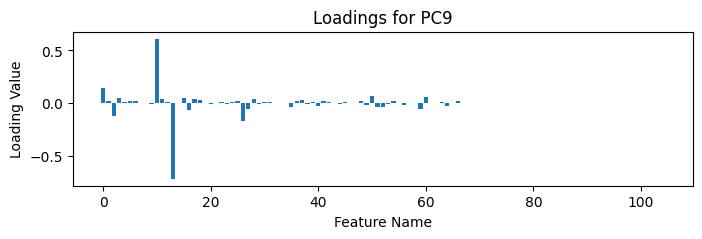

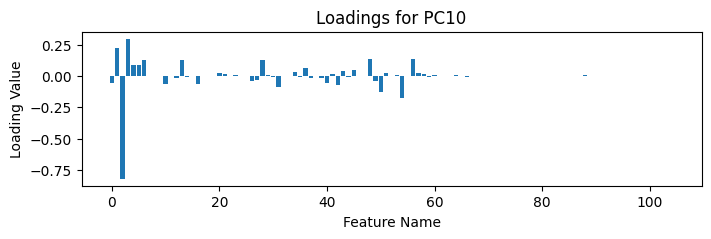

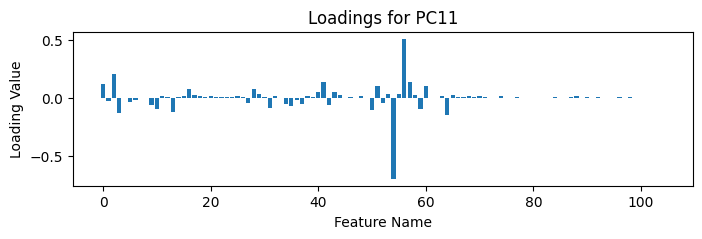

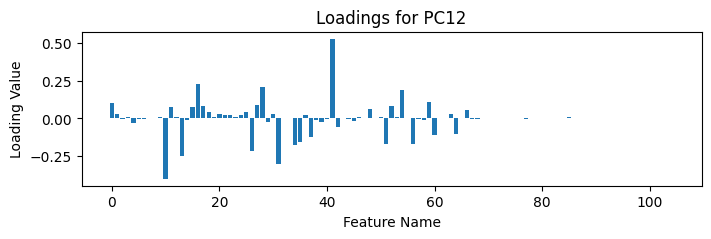

In [57]:
# Plot für jede Hauptkomponente
for i in range(loadings_matrix.shape[0]):
    plt.figure(figsize=(8, 2))
    plt.bar(range(len(loadings_matrix[i])), loadings_matrix[i])
    plt.title(f'Loadings for PC{i+1}')
    plt.xlabel('Feature Name')
    plt.ylabel('Loading Value')
    plt.show()

<h2>Predictions and Evaluations

In [65]:
# Performance Evaluation
# Counting the ones as this is the naive case. Note that 'income' is the 'income_raw' data encoded to numerical values done in the data preprocessing step.
TP = np.sum(income) 
# Specific to the naive case
FP = income.count() - TP
# No predicted negatives in the naive case
TN = 0 
FN = 0 

# Calculate accuracy, precision and recall
accuracy = TP / (TP + FP + TN + FN)
recall = TP / (TP + FN)
precision = TP / (TP + FP)

# Calculate F-score using the formula above for beta = 0.5 and correct values for precision and recall.
beta = 0.5
fscore = (1 + beta**2) * ((precision * recall) / ((beta**2) * precision + recall))

# Print the results 
print("Naive Predictor: [Accuracy score: {:.4f}, F-score: {:.4f}]".format(accuracy, fscore))

Naive Predictor: [Accuracy score: 0.2393, F-score: 0.2822]


<h4> Predict the results

In [66]:
y_pred = gnb.predict(X_test)
y_pred

array(['<=50K', '>50K', '>50K', ..., '<=50K', '<=50K', '<=50K'],
      dtype='<U5')

<h4> Check accuracy score

In [67]:
from sklearn.metrics import accuracy_score

print('Model accuracy score: {0:0.4f}'. format(accuracy_score(y_test, y_pred)))

Model accuracy score: 0.7984


In [68]:
# compare the train-set and test-set accuracy
y_pred_train = gnb.predict(X_train)
y_pred_train
print('Training-set accuracy score: {0:0.4f}'. format(accuracy_score(y_train, y_pred_train)))

Training-set accuracy score: 0.8012


In [69]:
# Check for overfitting and underfitting
# print the scores on training and test set

print('Training set score: {:.4f}'.format(gnb.score(X_train, y_train)))

print('Test set score: {:.4f}'.format(gnb.score(X_test, y_test)))

Training set score: 0.8012
Test set score: 0.7984


In [70]:
# Compare model accuracy with null accuracy
# check class distribution in test set
y_test.value_counts()

income
<=50K    11138
>50K      3515
Name: count, dtype: int64

In [71]:
# Make predictions using the model
predictions = (gnb.fit(X_train, y_train)).predict(X_test)

# Report accuracy and fscore
print("Accuracy score on testing data {:.4f}".format(accuracy_score(y_test, predictions)))
#print("F-score on testing data: {:.4f}".format(fbeta_score(y_test, predictions, beta = 0.5)))

Accuracy score on testing data 0.7984


<h4> Confusion matrix

In [72]:
# Print the Confusion Matrix and slice it into four pieces
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
print('Confusion matrix\n\n', cm)
print('\nTrue Positives(TP) = ', cm[0,0])
print('\nTrue Negatives(TN) = ', cm[1,1])
print('\nFalse Positives(FP) = ', cm[0,1])
print('\nFalse Negatives(FN) = ', cm[1,0])

Confusion matrix

 [[8871 2267]
 [ 687 2828]]

True Positives(TP) =  8871

True Negatives(TN) =  2828

False Positives(FP) =  2267

False Negatives(FN) =  687


<Axes: >

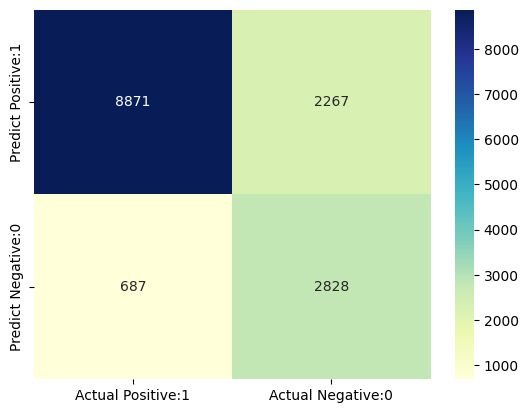

In [73]:
# visualize confusion matrix with seaborn heatmap
cm_matrix = pd.DataFrame(data=cm, columns=['Actual Positive:1', 'Actual Negative:0'], 
                                 index=['Predict Positive:1', 'Predict Negative:0'])
sns.heatmap(cm_matrix, annot=True, fmt='d', cmap='YlGnBu')

<h4> Classification metrices

In [74]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

       <=50K       0.93      0.80      0.86     11138
        >50K       0.56      0.80      0.66      3515

    accuracy                           0.80     14653
   macro avg       0.74      0.80      0.76     14653
weighted avg       0.84      0.80      0.81     14653



In [75]:
TP = cm[0,0]
TN = cm[1,1]
FP = cm[0,1]
FN = cm[1,0]

# print classification accuracy
classification_accuracy = (TP + TN) / float(TP + TN + FP + FN)
print('Classification accuracy : {0:0.4f}'.format(classification_accuracy))

Classification accuracy : 0.7984


In [76]:
# print classification error
classification_error = (FP + FN) / float(TP + TN + FP + FN)
print('Classification error : {0:0.4f}'.format(classification_error))

Classification error : 0.2016


<h4> Class probabilities

In [77]:
y_pred_prob = gnb.predict_proba(X_test)[0:10]
# store the probabilities in dataframe
y_pred_prob_df = pd.DataFrame(data=y_pred_prob, columns=['Prob of - <=50K', 'Prob of - >50K'])

# store the predicted probabilities for class 1 - Probability of >50K
y_pred1 = gnb.predict_proba(X_test)[:, 1]

Text(0, 0.5, 'Frequency')

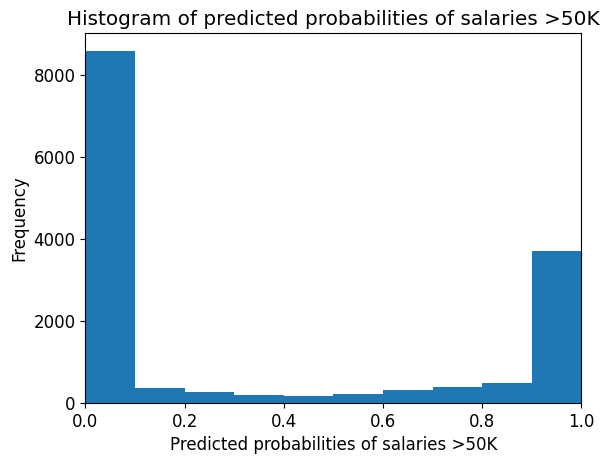

In [78]:
# plot histogram of predicted probabilities

# adjust the font size 
plt.rcParams['font.size'] = 12

# plot histogram with 10 bins
plt.hist(y_pred1, bins = 10)

# set the title of predicted probabilities
plt.title('Histogram of predicted probabilities of salaries >50K')

# set the x-axis limit
plt.xlim(0,1)

# set the title
plt.xlabel('Predicted probabilities of salaries >50K')
plt.ylabel('Frequency')

<h2> Explainability with Interpret